<a href="https://colab.research.google.com/github/databyhuseyn/MachineLearning/blob/main/Bank_Churn_Analysis_Data_Centric_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [262]:
data = pd.read_csv('/content/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [263]:
data_to_append_0 = data[data['Exited'] == 0][:2037]
data_to_append_1 = data[data['Exited'] == 1][:2037]

In [264]:
data = pd.concat([data_to_append_0, data_to_append_1])

In [265]:
data.drop(['RowNumber', 'Surname', 'CustomerId'], axis=1, inplace=True)

In [266]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000,4074.000000
mean,649.691949,41.082474,5.022582,82650.136794,1.511537,0.704222,0.461708,100864.806065,0.500000
std,98.438873,10.517219,2.902877,61290.393744,0.672120,0.456448,0.498593,57524.655990,0.500061
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,581.250000,33.250000,3.000000,0.000000,1.000000,0.000000,0.000000,51924.020000,0.000000
50%,651.000000,40.000000,5.000000,103562.700000,1.000000,1.000000,0.000000,101048.740000,0.500000
75%,719.000000,48.000000,8.000000,129643.745000,2.000000,1.000000,1.000000,150210.875000,1.000000
max,850.000000,88.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199857.470000,1.000000


In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 1 to 9998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      4074 non-null   int64  
 1   Geography        4074 non-null   object 
 2   Gender           4074 non-null   object 
 3   Age              4074 non-null   int64  
 4   Tenure           4074 non-null   int64  
 5   Balance          4074 non-null   float64
 6   NumOfProducts    4074 non-null   int64  
 7   HasCrCard        4074 non-null   int64  
 8   IsActiveMember   4074 non-null   int64  
 9   EstimatedSalary  4074 non-null   float64
 10  Exited           4074 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 381.9+ KB


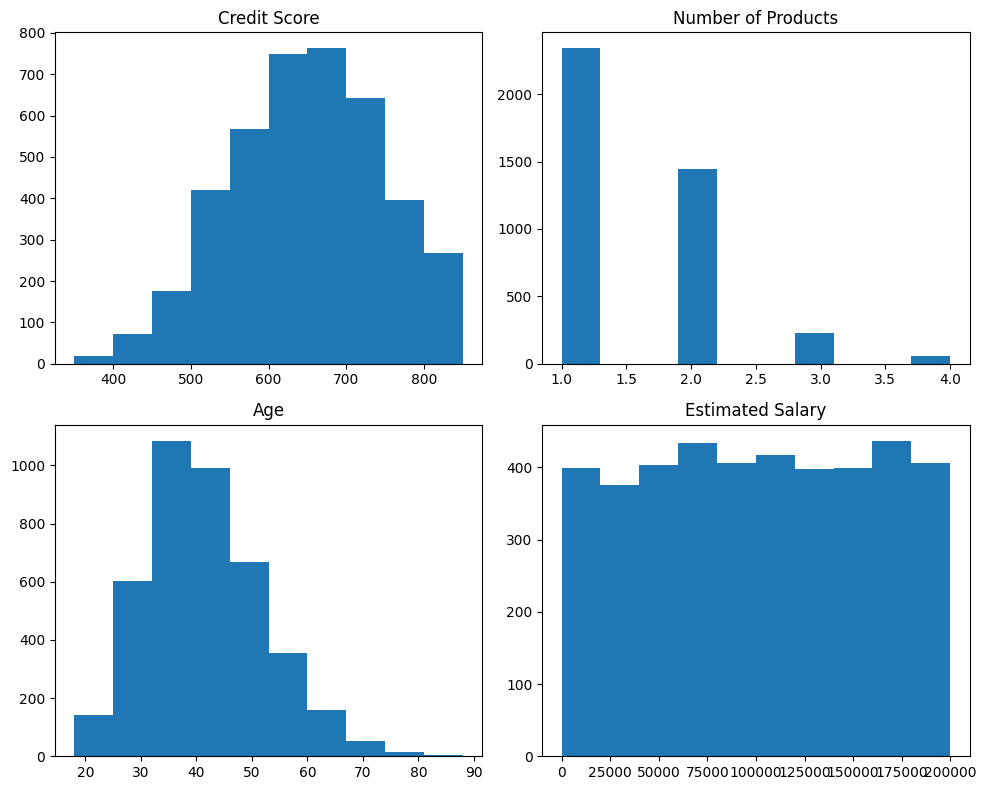

In [268]:
import matplotlib.pyplot as plt

# Create a figure and axes array with 2 rows and 2 columns
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the histograms
axs[0, 0].hist(data['CreditScore'])
axs[0, 0].set_title('Credit Score')

axs[0, 1].hist(data['NumOfProducts'])
axs[0, 1].set_title('Number of Products')

axs[1, 0].hist(data['Age'])
axs[1, 0].set_title('Age')

axs[1, 1].hist(data['EstimatedSalary'])
axs[1, 1].set_title('Estimated Salary')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [269]:
data['Exited'].value_counts()

Exited
0    2037
1    2037
Name: count, dtype: int64

In [270]:
X = data.drop(['Exited'], axis=1)
y = data['Exited']

In [271]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, stratify=y_train_full)

In [272]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline as imbpipeline

In [273]:
num_features = X.select_dtypes(include=[np.number]).columns
cat_features = X.select_dtypes(exclude=[np.number]).columns

In [274]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder())
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder='passthrough')

In [275]:
full_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('lr', LogisticRegression())
])

In [276]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('lr', LogisticRegression())])

In [277]:
full_pipeline.score(X_train, y_train), full_pipeline.score(X_test, y_test)

(0.6950517836593786, 0.7226993865030675)

In [278]:
train_predict = full_pipeline.predict(X_train)
valid_predict = full_pipeline.predict(X_valid)
test_predict = full_pipeline.predict(X_test)

In [279]:
from sklearn.metrics import f1_score

In [280]:
print(f'Train score is: {f1_score(y_train, train_predict)} , Validation score is: {f1_score(y_valid, valid_predict)} ,Test score is: {f1_score(y_test, test_predict)}')

Train score is: 0.6900584795321637 , Validation score is: 0.7064364207221351 ,Test score is: 0.7216748768472907


# Add Polynomial Features and use SMOTE

In [281]:
from sklearn.preprocessing import PolynomialFeatures

In [282]:
num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures())
])

cat_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value='Missing')),
    ('onehot', OneHotEncoder()),
    ('poly', PolynomialFeatures())
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
], remainder='passthrough')

In [283]:
full_pipeline = imbpipeline([
    ('preprocessing', transformer),
    ('smote', SMOTE()),
    ('lr', LogisticRegression())
])

In [284]:
full_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('smote', SMOTE()), ('lr', LogisticRegression())])

In [285]:
full_pipeline.score(X_train, y_train), full_pipeline.score(X_test, y_test)

(0.7756041426927502, 0.7754601226993865)

In [286]:
train_predict = full_pipeline.predict(X_train)
valid_predict = full_pipeline.predict(X_valid)
test_predict = full_pipeline.predict(X_test)

In [287]:
from sklearn.metrics import f1_score

In [288]:
print(f'Train score is: {f1_score(y_train, train_predict)} , Validation score is: {f1_score(y_valid, valid_predict)} ,Test score is: {f1_score(y_test, test_predict)}')

Train score is: 0.7731678945327647 , Validation score is: 0.757433489827856 ,Test score is: 0.7754601226993866


In [289]:
from sklearn.model_selection import GridSearchCV

In [294]:
param_grid = {
    'lr__penalty' : ['l1', 'l2', 'elasticnet'],
    'lr__class_weight' : ['balanced'],
    'lr__solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    }

gscv = GridSearchCV(full_pipeline, param_grid, cv=5)
best_model = gscv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

In [295]:
best_model.best_params_

{'lr__class_weight': 'balanced',
 'lr__penalty': 'l2',
 'lr__solver': 'newton-cholesky'}

In [296]:
best_model.best_estimator_.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(fill_value='Missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder()),
                                                                  ('poly',
                                                                   PolynomialFeatures())]),
                                                  Index(['Geography', 'Gender'], dtype='object'))])),
                ('smote', SMOTE()),
                ('lr',
                 LogisticRegression(class_weight='balanced',
                                    solver='newton-cholesky'))])

In [297]:
best_model.best_estimator_.score(X_train, y_train), best_model.best_estimator_.score(X_valid, y_valid), best_model.best_estimator_.score(X_test, y_test)

(0.7763713080168776, 0.7622699386503068, 0.7754601226993865)

In [298]:
train_predict = best_model.best_estimator_.predict(X_train)
valid_predict = best_model.best_estimator_.predict(X_valid)
test_predict = best_model.best_estimator_.predict(X_test)

In [299]:
print(f'Train score is: {f1_score(y_train, train_predict)} , Validation score is: {f1_score(y_valid, valid_predict)} ,Test score is: {f1_score(y_test, test_predict)}')

Train score is: 0.774118558698179 , Validation score is: 0.757433489827856 ,Test score is: 0.7754601226993866
